In [25]:
import pandas as pd
docs_train = pd.read_csv('movie_review_train.csv')
docs_test = pd.read_csv('movie_review_test.csv')
docs_train.head()
docs_test.head()

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


In [28]:
len(docs_train)

1600

In [29]:
len(docs_test)

400

In [30]:
Pos_Neg = docs_train['class'].value_counts()


In [31]:
Pos_Neg

Neg    800
Pos    800
Name: class, dtype: int64

In [32]:
print("Neg rate is about {0}%".format(
round(Pos_Neg[1]/float(Pos_Neg[0]+Pos_Neg[1])*100),2))

Neg rate is about 50%


In [33]:
docs_train['label'] = docs_train['class'].map({'Pos': 1, 'Neg': 0})

In [38]:
docs_test['label'] = docs_test['class'].map({'Pos': 1, 'Neg': 0})

In [34]:
docs_train.head()

,class,text,label
0,Pos,a common complaint amongst film critics is ...,1
1,Pos,whew this film oozes energy the kind of b...,1
2,Pos,steven spielberg s amistad which is bas...,1
3,Pos,he has spent his entire life in an awful litt...,1
4,Pos,being that it is a foreign language film with...,1


In [39]:
docs_test.head()

,class,text,label
0,Pos,films adapted from comic books have had plent...,1
1,Pos,every now and then a movie comes along from a...,1
2,Pos,you ve got mail works alot better than it des...,1
3,Pos,jaws is a rare film that grabs your atte...,1
4,Pos,moviemaking is a lot like being the general m...,1


In [35]:
docs_train = docs_train.drop('class', axis=1)

In [40]:
docs_test = docs_test.drop('class', axis=1)

In [36]:
docs_train.head()

,text,label
0,a common complaint amongst film critics is ...,1
1,whew this film oozes energy the kind of b...,1
2,steven spielberg s amistad which is bas...,1
3,he has spent his entire life in an awful litt...,1
4,being that it is a foreign language film with...,1


In [41]:
docs_test.head()

,text,label
0,films adapted from comic books have had plent...,1
1,every now and then a movie comes along from a...,1
2,you ve got mail works alot better than it des...,1
3,jaws is a rare film that grabs your atte...,1
4,moviemaking is a lot like being the general m...,1


In [37]:
X_train = docs_train.text
y_train = docs_train.label
print(X_train.shape)
print(y_train.shape)

(1600,)
(1600,)


In [42]:
X_test = docs_test.text
y_test = docs_test.label
print(X_test.shape)
print(y_test.shape)

(400,)
(400,)


In [11]:
#from sklearn.model_selection import train_test_split
#X_train, y_train= train_test_split(X, y, random_state=1)

In [43]:
X_train.head()

0     a common complaint amongst film critics is   ...
1     whew   this film oozes energy   the kind of b...
2     steven spielberg s   amistad     which is bas...
3     he has spent his entire life in an awful litt...
4     being that it is a foreign language film with...
Name: text, dtype: object

In [16]:
#vectorize the sentences, removing stopwords
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words='english')
vec3 = CountVectorizer(stop_words='english',min_df=0.03,max_df=0.8)


In [17]:
vec

CountVectorizer(stop_words='english')

In [18]:
vec3

CountVectorizer(max_df=0.8, min_df=0.03, stop_words='english')

In [19]:
vec.fit(X_train)

CountVectorizer(stop_words='english')

In [20]:
vec3.fit(X_train)

CountVectorizer(max_df=0.8, min_df=0.03, stop_words='english')

In [21]:
#help(vec)

In [22]:
vec.vocabulary_

{'common': 6284,
 'complaint': 6360,
 'film': 11832,
 'critics': 7378,
 'aren': 1810,
 'literate': 18603,
 'scripts': 27918,
 'available': 2319,
 'quiz': 25250,
 'gives': 13262,
 'signs': 28809,
 'hope': 15074,
 'art': 1928,
 'writing': 35521,
 'isn': 16771,
 'dead': 7904,
 'hollywood': 14963,
 'need': 21281,
 'look': 18770,
 'independent': 15988,
 'films': 11851,
 'thoughtful': 32060,
 'content': 6771,
 'paul': 23045,
 'attanasio': 2173,
 'script': 27912,
 'takes': 31486,
 'tepid': 31839,
 'thriller': 32090,
 'scandals': 27629,
 'late': 18017,
 '50s': 313,
 'delivers': 8215,
 'telling': 31765,
 'parable': 22815,
 'emptiness': 10340,
 'post': 24178,
 'war': 34707,
 'american': 1334,
 'dream': 9554,
 'golden': 13449,
 'bubble': 4285,
 'surrounds': 31156,
 'protects': 24849,
 'tv': 33056,
 'networks': 21378,
 'sponsors': 29948,
 'riddled': 26743,
 'symbols': 31370,
 '58': 328,
 'chrysler': 5614,
 'radio': 25314,
 'announcement': 1534,
 'sputnik': 30053,
 'heavy': 14532,
 'handed': 14185,

In [23]:
vec3.vocabulary_

{'common': 264,
 'critics': 323,
 'aren': 78,
 'available': 101,
 'gives': 618,
 'hope': 693,
 'art': 81,
 'writing': 1632,
 'isn': 753,
 'dead': 342,
 'hollywood': 690,
 'need': 970,
 'look': 853,
 'films': 549,
 'content': 287,
 'paul': 1037,
 'script': 1248,
 'takes': 1429,
 'thriller': 1471,
 'late': 805,
 'delivers': 357,
 'telling': 1449,
 'post': 1089,
 'war': 1571,
 'american': 59,
 'dream': 413,
 'tv': 1512,
 'radio': 1145,
 'heavy': 673,
 'direction': 386,
 'robert': 1205,
 'performances': 1043,
 'john': 766,
 'rob': 1204,
 'perfectly': 1041,
 'usually': 1537,
 'quality': 1136,
 'sets': 1272,
 'camera': 192,
 'work': 1618,
 'recent': 1165,
 'century': 213,
 'period': 1044,
 'pieces': 1056,
 'years': 1638,
 'old': 1001,
 'images': 716,
 'true': 1502,
 'era': 464,
 'generation': 605,
 'gone': 625,
 '15': 4,
 'world': 1623,
 'themes': 1461,
 'good': 626,
 'life': 831,
 'family': 508,
 'match': 894,
 'father': 521,
 'fame': 506,
 'audience': 99,
 'appear': 72,
 'familiar': 507,
 

In [24]:
len(vec3.vocabulary_)

1643

In [17]:
X_train_vocabs_vec = vec.get_feature_names()
len(X_train_vocabs_vec)

35858

In [18]:
len(vec.vocabulary_.keys())

31849

In [47]:
# transforming the train and test datasets
X_train_transformed = vec.transform(X_train)
#X_test_transformed = vec.transform(X_test)

In [48]:
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 57)	1
  (0, 225)	1
  (0, 313)	4
  (0, 328)	1
  (0, 1334)	2
  (0, 1534)	1
  (0, 1676)	1
  (0, 1810)	1
  (0, 1928)	1
  (0, 2058)	1
  (0, 2173)	1
  (0, 2229)	3
  (0, 2277)	1
  (0, 2319)	1
  (0, 2997)	1
  (0, 3604)	1
  (0, 4200)	1
  (0, 4285)	1
  (0, 4573)	1
  (0, 4582)	1
  (0, 4690)	1
  (0, 4838)	1
  (0, 4839)	1
  (0, 4869)	2
  (0, 5131)	1
  :	:
  (1599, 30670)	1
  (1599, 30808)	1
  (1599, 30928)	1
  (1599, 31107)	1
  (1599, 31162)	1
  (1599, 31198)	1
  (1599, 31483)	1
  (1599, 31486)	2
  (1599, 31717)	1
  (1599, 31761)	1
  (1599, 31954)	1
  (1599, 32120)	1
  (1599, 32544)	1
  (1599, 32894)	1
  (1599, 33323)	1
  (1599, 33801)	1
  (1599, 33949)	1
  (1599, 34330)	1
  (1599, 34400)	1
  (1599, 34424)	1
  (1599, 34706)	1
  (1599, 34788)	2
  (1599, 34965)	1
  (1599, 35351)	1
  (1599, 35396)	1


In [49]:
X_test

0       films adapted from comic books have had plent...
1       every now and then a movie comes along from a...
2       you ve got mail works alot better than it des...
3          jaws   is a rare film that grabs your atte...
4       moviemaking is a lot like being the general m...
                             ...                        
395     one of the first films of 1999 is this mtv pi...
396     susan granger s review of   america s sweethe...
397     susan granger s review of   jeepers creepers ...
398     this independent film written and directed by...
399     come on hollywood   surprise me    stop givin...
Name: text, Length: 400, dtype: object

In [50]:
X_test_transformed = vec.transform(X_test)

In [51]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)


In [52]:
mnb

MultinomialNB()

In [53]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.795

In [54]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)
# help(metrics.confusion_matrix)

array([[162,  38],
       [ 44, 156]], dtype=int64)

In [55]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[162  38]
 [ 44 156]]


In [56]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.78


In [57]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.81


In [58]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.8041237113402062
0.8041237113402062


In [59]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.8041237113402062
PRECISION SCORE : 0.8041237113402062
RECALL SCORE : 0.78
F1 SCORE : 0.7918781725888325


In [60]:
y_pred_class

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [61]:
y_pred_proba

array([[9.99815544e-01, 1.84456400e-04],
       [1.80431723e-08, 9.99999982e-01],
       [2.93597323e-04, 9.99706403e-01],
       [1.37891062e-22, 1.00000000e+00],
       [9.99992587e-01, 7.41255840e-06],
       [2.52436000e-40, 1.00000000e+00],
       [3.31873454e-38, 1.00000000e+00],
       [1.62120574e-04, 9.99837879e-01],
       [5.64657141e-04, 9.99435343e-01],
       [2.27934669e-17, 1.00000000e+00],
       [6.45031025e-11, 1.00000000e+00],
       [3.30466641e-16, 1.00000000e+00],
       [3.56839515e-15, 1.00000000e+00],
       [1.01922028e-19, 1.00000000e+00],
       [4.52327526e-07, 9.99999548e-01],
       [7.43064598e-09, 9.99999993e-01],
       [3.80502907e-04, 9.99619497e-01],
       [6.69381494e-24, 1.00000000e+00],
       [3.16041572e-07, 9.99999684e-01],
       [9.99998734e-01, 1.26589019e-06],
       [1.21615068e-04, 9.99878385e-01],
       [1.56937693e-04, 9.99843062e-01],
       [1.00000000e+00, 1.86510166e-10],
       [1.58722898e-31, 1.00000000e+00],
       [3.260045

In [62]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [63]:
# area under the curve
print (roc_auc)

0.8668375


In [36]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.454082,0.049020
2,1.000000e+00,0.464286,0.049020
3,1.000000e+00,0.474490,0.049020
4,1.000000e+00,0.484694,0.049020
...,...,...,...
82,9.553986e-23,0.989796,0.833333
83,7.646669e-23,0.994898,0.833333
84,4.092430e-34,0.994898,0.960784
85,8.016768e-35,1.000000,0.960784


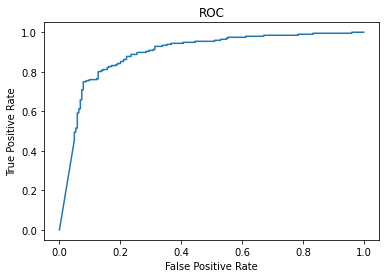

In [37]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)